# May 15th, 2022 (rabies highpass: copy + plot n_t removed)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
_fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# RABIES
sys.path.insert(0, pjoin(git_dir, 'RABIES'))
from rabies.confound_correction_pkg.utils import butterworth as rb_butter

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Copy HighPass Data

In [2]:
mice = Mice(192)

In [10]:
sorted(os.listdir(mice.cfg.raw_dir))

[
    'sub-SLC01_ses-1_space-individual_acq-isotropic_T1w.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-fineatlas2d_ca2.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-mask_bold.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-mask_ca2.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-referenceimage_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-4_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-4_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_space-individual_acq-isotropic_T1w.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-fineatlas2d_ca2.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-mask_bold.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-mask_ca2.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-referenceimage_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-3_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-3_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-3_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-5_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-5_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-5_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-7_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-7_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-7_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-3_space-individual_acq-isotropic_T1w.nii.gz',
    'sub-SLC01_ses-3_space-individual_desc-fineatlas2d_ca2

In [11]:
%%time

pth = '/mnt/storage/hadi/Ca-fMRI/gabe_data/reoriented_data_highpass/cleaned_timeseries'
for sub in range(1, 10 + 1):
    for ses in range(1, 3 + 1):
        key = f"sub-SLC{sub:02d}_ses-{ses}"
        files = sorted(filter(
            lambda x: key in x,
            os.listdir(pth),
        ))
        for f in files:
            name = '_'.join(f.split('_')[:4])
            name = f"{name}_space-individual_desc-rabies-hp_bold.nii.gz"
            filename = pjoin(mice.cfg.raw_dir, name)
            if not os.path.isfile(filename):
                shutil.copyfile(
                    src=pjoin(pth, f),
                    dst=filename,
                )
            else:
                print(f"File found, skipping:\n'{name}'\n")

CPU times: user 169 ms, sys: 7min 44s, total: 7min 45s
Wall time: 24min 44s


In [12]:
sorted(os.listdir(mice.cfg.raw_dir))

[
    'sub-SLC01_ses-1_space-individual_acq-isotropic_T1w.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-fineatlas2d_ca2.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-mask_bold.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-mask_ca2.nii.gz',
    'sub-SLC01_ses-1_space-individual_desc-referenceimage_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-2_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-4_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-4_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-led_run-6_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-1_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-3_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-5_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-1_task-rest_run-7_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_space-individual_acq-isotropic_T1w.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-fineatlas2d_ca2.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-mask_bold.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-mask_ca2.nii.gz',
    'sub-SLC01_ses-2_space-individual_desc-referenceimage_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-2_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-4_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-led_run-6_space-individual_desc-raw_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-preproc_ca2.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-rabies-hp_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-rabies_bold.nii.gz',
    'sub-SLC01_ses-2_task-rest_run-1_space-individual_desc-raw_bold.nii.gz',
    'sub-

## New time masks

In [13]:
pth = '/mnt/storage/hadi/Ca-fMRI/gabe_data/reoriented_data_highpass'
csv_files = []
for p in pathlib.Path(pth).rglob('*.csv'):
    csv_files.append(str(p))

In [16]:
meta_dir = pjoin(mice.cfg.base_dir, 'meta_info')

dlist = []
for sub in range(1, 10 + 1):
    for ses in range(1, 3 + 1):
        for run in range(1, 7 + 1):
            patterns = [
                f"sub-SLC{sub:02d}",
                f"ses-{ses:d}",
                f"run-{run:d}",
            ]
            key = '_'.join(patterns)
            try:
                f = next(
                    e for e in csv_files if
                    all(k in e for k in patterns)
                )
                vals = pd.read_csv(f).values.ravel()
                dlist.append({
                    'sub': [sub] * len(vals),
                    'ses': [ses] * len(vals),
                    'run': [run] * len(vals),
                    'key': [key] * len(vals),
                    'temporal_mask': vals.astype(int),
                })
            except StopIteration:
                print(f"Warning, missing:\t{key}")

df = pd.DataFrame(merge_dicts(dlist))
_ = save_obj(
    obj=df,
    file_name='temporal_mask_hp',
    save_dir=meta_dir,
    mode='df',
)

Warning, missing:       sub-SLC01_ses-1_run-4

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC03_ses-3_run-2

Warning, missing:       sub-SLC04_ses-3_run-2

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC07_ses-1_run-6

Warning, missing:       sub-SLC07_ses-2_run-1

Warning, missing:       sub-SLC08_ses-1_run-7

Warning, missing:       sub-SLC10_ses-1_run-5

[PROGRESS] 'temporal_mask_hp.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

In [17]:
pth = '/home/hadi/Documents/Ca-fMRI/meta_info'
df = pd.read_pickle(pjoin(pth, 'temporal_mask_hp.df'))
present = df['key'].unique()
missing = []
for sub in range(1, 10 + 1):
    for ses in range(1, 3 + 1):
        for run in range(1, 7 + 1):
            key = f"sub-SLC{sub:02d}_ses-{ses}_run-{run}"
            if key not in present:
                missing.append(key)
missing

[
    'sub-SLC01_ses-1_run-4',
    'sub-SLC03_ses-1_run-1',
    'sub-SLC03_ses-3_run-2',
    'sub-SLC04_ses-3_run-2',
    'sub-SLC05_ses-1_run-5',
    'sub-SLC06_ses-3_run-2',
    'sub-SLC07_ses-1_run-6',
    'sub-SLC07_ses-2_run-1',
    'sub-SLC08_ses-1_run-7',
    'sub-SLC10_ses-1_run-5'
]

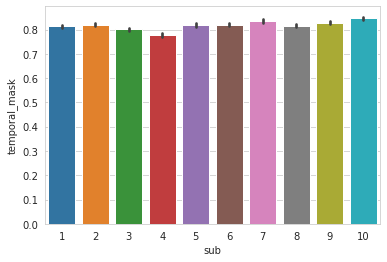

In [18]:
sns.barplot(data=df, x='sub', y='temporal_mask')
plt.show()

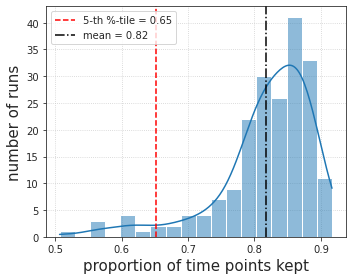

In [19]:
df = df.groupby(['key']).mean()

fig, ax = create_figure(1, 1, (5, 4))

sns.histplot(df, x='temporal_mask', kde=True, ax=ax)
q = df['temporal_mask'].quantile(q=0.05)
ax.axvline(q, color='r', ls='--', label=f'5-th %-tile = {q:0.2f}')
q = df['temporal_mask'].mean()
ax.axvline(q, color='k', ls='-.', label=f'mean = {q:0.2f}')
ax.set_xlabel('proportion of time points kept', fontsize=15)
ax.set_ylabel('number of runs', fontsize=15)
ax.grid()
ax.legend()

plt.show()

## Empty?

In [10]:
pth = '/mnt/storage/hadi/Ca-fMRI/gabe_data/reoriented_data_highpass/frame_censoring_mask'
img = ants.image_read(pjoin(pth, 'empty.nii.gz'))
img

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (1, 1)
         Spacing    : (1.0, 1.0)
         Origin     : (0.0, 0.0)
         Direction  : [1. 0. 0. 1.]

In [11]:
img.numpy()

array([[0.08560166]], dtype=float32)